/tmp/ipykernel_6478/2165112394.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
/tmp/ipykernel_6478/2165112394.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_rewards_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
/tmp/ipykernel_6478/2165112394.py:48: DeprecationWarning: D

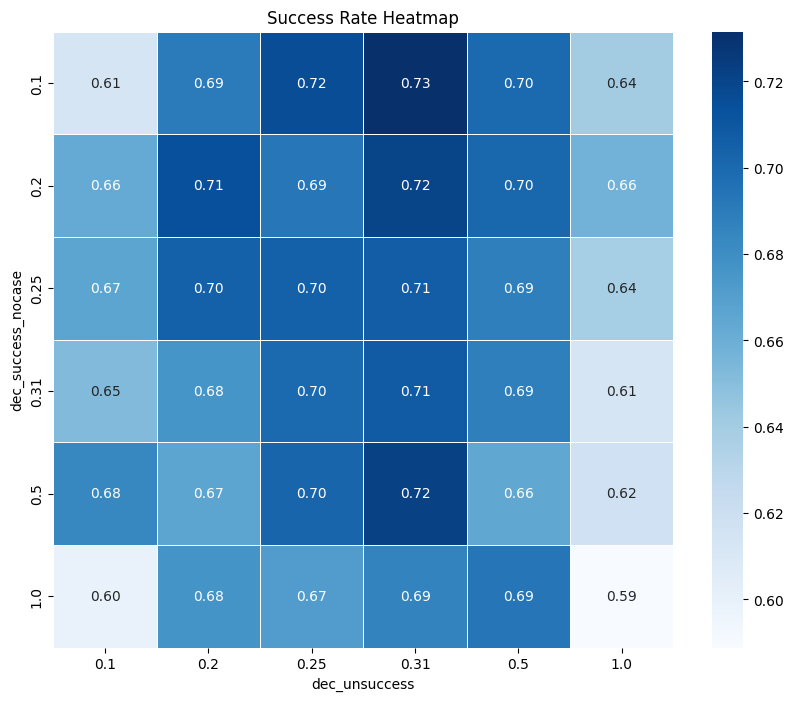

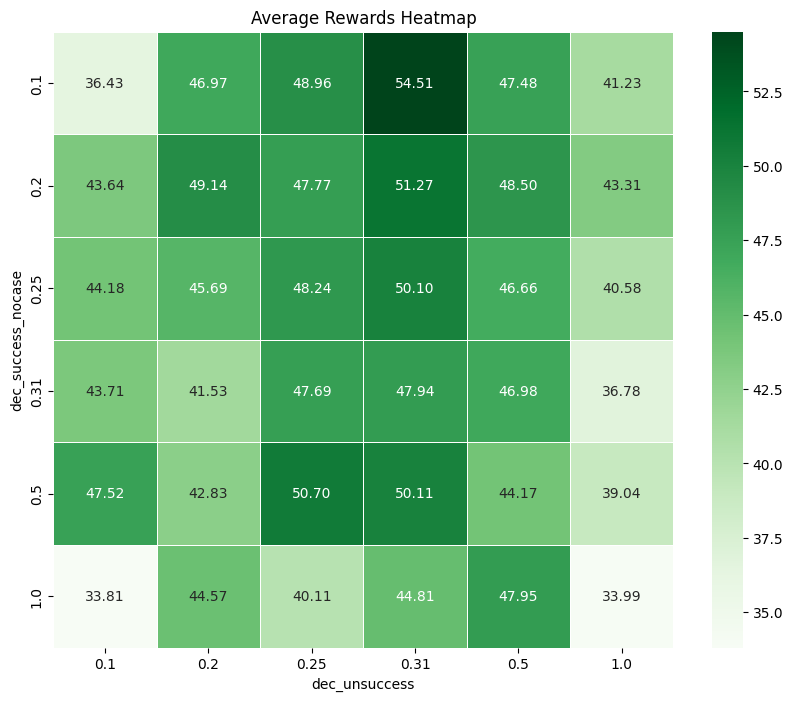

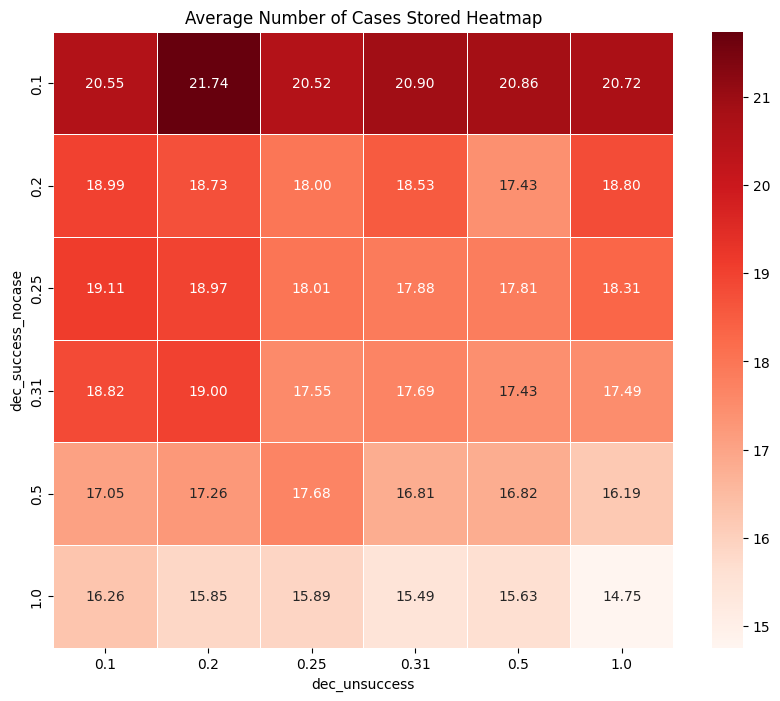

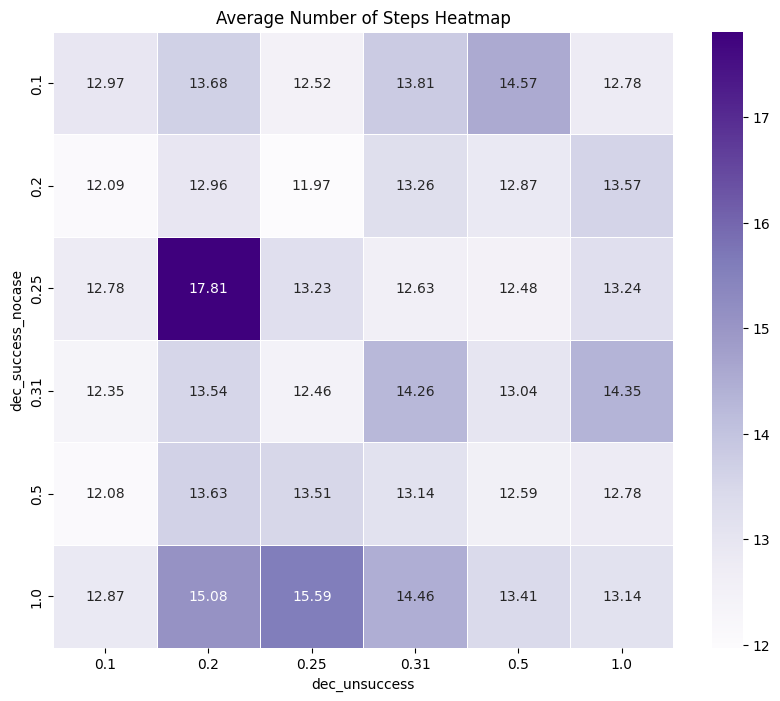

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Folder path containing CSV files in the current directory
folder_path = './d-t01/'

# Variable to control how many episodes to average together
episodes_per_average = 1

# Initialize an empty list to hold data from all files
all_data_frames = []

# Loop through all CSV files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Load the data from the CSV file and append to the list
        df = pd.read_csv(file_path)
        df['filename'] = filename  # Add a filename column to keep track of source
        all_data_frames.append(df)

# If no CSV files are found, exit without generating the graph
if len(all_data_frames) == 0:
    print("No CSV files found in the specified folder.")
else:
    # Concatenate all data frames into a single data frame
    combined_data = pd.concat(all_data_frames, ignore_index=True)

    # Set total steps to 0 for non-successful episodes
    combined_data.loc[combined_data['eps_status'] == 0, 'total_steps'] = 0

    # Create a new column for grouping episodes in batches
    combined_data['eps_group'] = (combined_data['eps'] // episodes_per_average) * episodes_per_average

    # Heatmap 1: Success Rate
    success_rate_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
        lambda x: (x['eps_status'].sum() / len(x))
    ).unstack(fill_value=0)

    # Heatmap 2: Average Rewards
    average_rewards_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
        lambda x: (x['rewards_agent_0'].mean() + x['rewards_agent_1'].mean()) / 2
    ).unstack(fill_value=0)

    # Heatmap 3: Average Cases Stored
    average_cases_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
        lambda x: (x['total_case_agent_0'].mean() + x['total_case_agent_1'].mean()) / 2
    ).unstack(fill_value=0)

    # Heatmap 4: Average Number of Steps
    average_steps_data = combined_data.groupby(['dec_success_nocase', 'dec_unsuccess']).apply(
        lambda x: x['total_steps'].mean()
    ).unstack(fill_value=0)

    # First heatmap: Success rate
    plt.figure(figsize=(10, 8))
    sns.heatmap(success_rate_data, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Success Rate Heatmap")
    plt.xlabel("dec_unsuccess")
    plt.ylabel("dec_success_nocase")
    plt.show()

    # Second heatmap: Average rewards
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_rewards_data, cmap='Greens', annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Average Rewards Heatmap")
    plt.xlabel("dec_unsuccess")
    plt.ylabel("dec_success_nocase")
    plt.show()

    # Third heatmap: Average number of cases stored
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_cases_data, cmap='Reds', annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Average Number of Cases Stored Heatmap")
    plt.xlabel("dec_unsuccess")
    plt.ylabel("dec_success_nocase")
    plt.show()

    # Fourth heatmap: Average number of steps
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_steps_data, cmap='Purples', annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Average Number of Steps Heatmap")
    plt.xlabel("dec_unsuccess")
    plt.ylabel("dec_success_nocase")
    plt.show()
